<a href="https://colab.research.google.com/github/TungAnhDep/Fundamental-Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Target: Develop a simple CNN


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms, datasets

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

In [ ]:
#Prepare Dataset:
train_dataset = datasets.MNIST(root='.', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
valid_dataset = datasets.MNIST(root='.', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_dataset, batch_size =64, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = 64)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.83MB/s]


In [ ]:
img_channel, img_height, img_width = train_dataset[0][0].shape
num_classes = len(train_dataset.classes)

In [ ]:
print(img_channel)

1


In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 25, kernel_size=3, stride =1, padding=1), #25x28x28
    nn.BatchNorm2d(25),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride =2), #25x14x14
    nn.Conv2d(25,50, kernel_size=3, stride=1, padding=1),#50x14x14
    nn.BatchNorm2d(50),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.MaxPool2d(kernel_size=2, stride =2),#50x7x7
    nn.Conv2d(50,75,kernel_size=3, stride=1, padding=1),#75x7x7
    nn.BatchNorm2d(75),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),#75x3x3
    nn.Flatten(),
    nn.Linear(75*3*3, 512),
    nn.ReLU(),
    nn.Linear(512,num_classes)

)

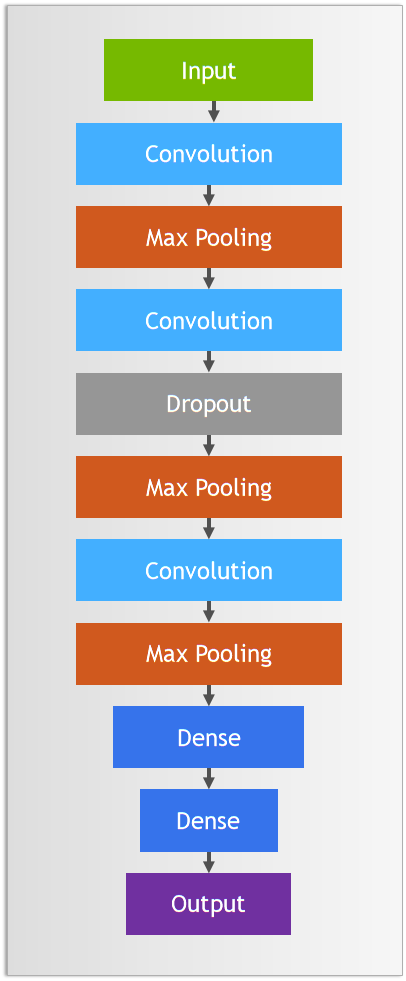

In [ ]:
model = torch.compile(model.to(device))
model

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Conv2d(1, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(25, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(50, 75, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=675, out_features=512, bias=True)
    (15): ReLU()


In [ ]:
optim = Adam(model.parameters(),lr = 1e-4)
loss_function = nn.CrossEntropyLoss()


In [ ]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [ ]:
def train():
  loss = 0
  accuracy = 0
  model.train()
  for x,y in train_loader:
    x,y = x.to(device), y.to(device)
    output = model(x)
    optim.zero_grad()
    batch_loss=loss_function(output,y)
    batch_loss.backward()
    optim.step()
    loss+=batch_loss.item()
    accuracy+=get_batch_accuracy(output,y,len(train_loader.dataset))
  print('FIXME - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))


In [ ]:
def validate():
  loss=0
  accuracy=0
  model.eval()
  with torch.no_grad():
    for x,y in valid_loader:
      x,y = x.to(device), y.to(device)
      out = model(x)
      loss+=loss_function(out,y).item()
      accuracy+=get_batch_accuracy(out, y, len(valid_loader.dataset))
  print('FIXME - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))


In [ ]:
epochs = 20
for epoch in range (epochs):
  print('Epoch: {}'.format(epoch))
  train()
  validate()

Epoch: 0
FIXME - Loss: 24.0928 Accuracy: 0.9920
FIXME - Loss: 4.4582 Accuracy: 0.9910
Epoch: 1
FIXME - Loss: 20.5697 Accuracy: 0.9936
FIXME - Loss: 3.7888 Accuracy: 0.9921
Epoch: 2
FIXME - Loss: 17.9656 Accuracy: 0.9935
FIXME - Loss: 5.7034 Accuracy: 0.9880
Epoch: 3
FIXME - Loss: 15.4668 Accuracy: 0.9949
FIXME - Loss: 3.4700 Accuracy: 0.9929
Epoch: 4
FIXME - Loss: 13.7231 Accuracy: 0.9953
FIXME - Loss: 4.8981 Accuracy: 0.9899
Epoch: 5
FIXME - Loss: 11.7329 Accuracy: 0.9962
FIXME - Loss: 3.7632 Accuracy: 0.9924
Epoch: 6
FIXME - Loss: 10.1621 Accuracy: 0.9966
FIXME - Loss: 4.3483 Accuracy: 0.9914
Epoch: 7
FIXME - Loss: 9.4372 Accuracy: 0.9967
FIXME - Loss: 3.9389 Accuracy: 0.9923
Epoch: 8
FIXME - Loss: 8.1703 Accuracy: 0.9972
FIXME - Loss: 3.5265 Accuracy: 0.9927
Epoch: 9
FIXME - Loss: 8.0703 Accuracy: 0.9972
FIXME - Loss: 3.4963 Accuracy: 0.9929
Epoch: 10
FIXME - Loss: 7.0833 Accuracy: 0.9976
FIXME - Loss: 3.4840 Accuracy: 0.9926
Epoch: 11
FIXME - Loss: 6.2398 Accuracy: 0.9979
FIXME - L